In [6]:
!pip install seaborn

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Dropping model column
data2=data.drop('model',axis=1)

#Show Key Statistics
data2.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<AxesSubplot:>

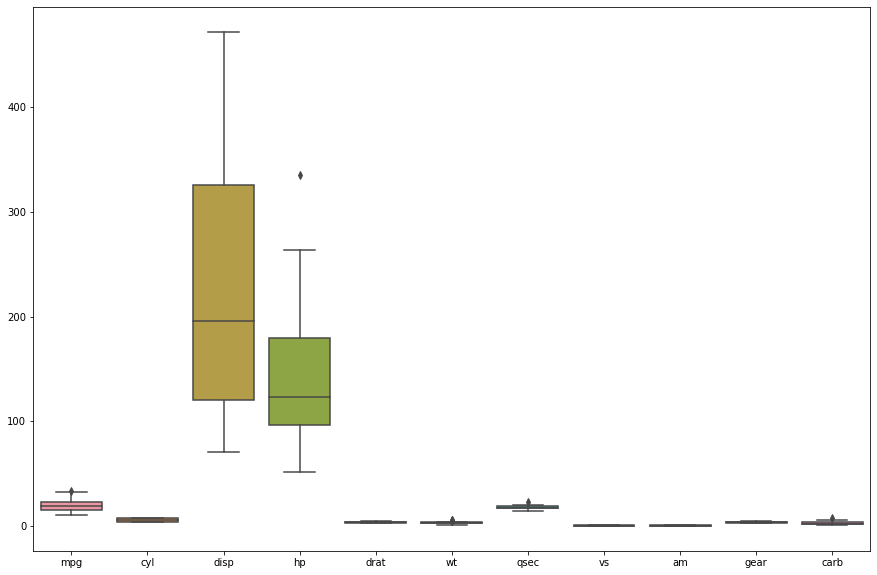

In [4]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=data2)

Note: mpg = miles per gallon

In [7]:
#Define x and y variable
x = data2.drop('mpg',axis=1).to_numpy()
y = data2['mpg'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [14]:
x_test

array([[  8.   , 275.8  , 180.   ,   3.07 ,   3.78 ,  18.   ,   0.   ,
          0.   ,   3.   ,   3.   ],
       [  8.   , 351.   , 264.   ,   4.22 ,   3.17 ,  14.5  ,   0.   ,
          1.   ,   5.   ,   4.   ],
       [  6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,   0.   ,
          1.   ,   4.   ,   4.   ],
       [  4.   , 120.3  ,  91.   ,   4.43 ,   2.14 ,  16.7  ,   0.   ,
          1.   ,   5.   ,   2.   ],
       [  6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,   1.   ,
          0.   ,   3.   ,   1.   ],
       [  4.   ,  75.7  ,  52.   ,   4.93 ,   1.615,  18.52 ,   1.   ,
          1.   ,   4.   ,   2.   ],
       [  6.   , 145.   , 175.   ,   3.62 ,   2.77 ,  15.5  ,   0.   ,
          1.   ,   5.   ,   6.   ]])

In [15]:
x_test2

array([[ 0.968496  ,  0.27063946,  0.46218336, -1.04069978,  0.45466446,
        -0.01634646, -0.96076892, -0.68599434, -0.87843813,  0.17632745],
       [ 0.968496  ,  0.85905417,  1.7017556 ,  1.58157179, -0.15579804,
        -2.05965451, -0.96076892,  1.45773797,  2.2588409 ,  0.80606835],
       [-0.13206764, -0.63545658, -0.5707935 ,  0.85189622, -0.4510217 ,
        -0.58847272, -0.96076892,  1.45773797,  0.69020139,  0.80606835],
       [-1.23263127, -0.94609573, -0.85117293,  2.06042138, -1.18657897,
        -0.77528945, -0.96076892,  1.45773797,  2.2588409 , -0.45341345],
       [-0.13206764, -0.12685345, -0.64457756, -1.74757298,  0.13442184,
         1.27969464,  1.040833  , -0.68599434, -0.87843813, -1.08315435],
       [-1.23263127, -1.29507572, -1.42668861,  3.20053946, -1.71197702,
         0.28723073,  1.040833  ,  1.45773797,  0.69020139, -0.45341345],
       [-0.13206764, -0.75282653,  0.3883993 ,  0.2134301 , -0.55610131,
        -1.47585221, -0.96076892,  1.45773797

In [8]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('mpg',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 19.87


      Coefficients
cyl       1.938951
disp      1.080770
hp       -0.310827
drat      1.321747
wt       -2.459684
qsec      1.461972
vs       -0.067494
am        0.888064
gear      2.599937
carb     -3.069300

R2: 0.30
Mean Absolute Error: 2.54
Mean Squared Error: 18.47
Root Mean Squared Error: 4.30


In [9]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,15.2,16.0,0.8
1,15.8,26.4,10.6
2,21.0,21.2,0.2
3,26.0,29.9,3.9
4,18.1,19.3,1.2
